# Análisis de Reviews de compras con NLP

Consideramos los datos de opiniones de usuarios en los siguientes productos: automóviles, hoteles, lavadoras, libros,
teléfonos celulares, música, computadoras y pelı́culas(400 opiniones). Para
el sentimiento tenemos dos categorias: yes y no, que indican las opiniones positivas
y negativas, respectı́vamente. Clasificaremos los sentimientos usando algunos métodos de clasificación.

In [61]:
from os import walk
from my_functions import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import SpectralEmbedding, TSNE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import linear_model, metrics

# Obteniendo una representación vectorial de los textos mediante Bag Of Words (BOW)

## creando un corpus

In [62]:
mypath = "all_files/"
_, _, filenames = next(walk(mypath))

In [63]:
archivos= [open(mypath+filename, "r", encoding="latin-1") for filename in filenames]
corpus = [archivo.read() for archivo in archivos]
corpus[0]

'Me compre este coche en el 2000.No lo he utilizado mucho.Actualmente (agosto 2002) tiene 22.800 km.Con solo 22.000,averia del embrague 70.000 ptas.Que dice Seat at.cliente? ha pasado la garantia no se hacen cargo,a pesar,que el mecanico me dijo que NO se debia a mal uso por mi parte.Lo arreglo.Resulta que el pedal,una vez arreglado,no sube del todo.Me lo vuelven a arreglar y actualmente sigue mal.Tiene ujnh ruido en los bajos que parece un concierto.No m atrevo a viajar de vacaciones con el.Muy normal con un coche de 20 años pero con este de 22.000 km? de risa.Eso si,asimila el aceite q es una maravilla!!! 6 litros hasta hoy.Ahoira llevo 2 meses sin mirar el deposito y estara por la mitad calculo yo.Una ganga este coche!!! Mantenerlo sale a precio d Audi.Ideal para gente joven.Gracias (bap_555@hotmail.com) '

## Preprocesando el corpus

In [64]:
preprocesador = preprocesaTexto(idioma='es', _tokeniza=False, _muestraCambios=False, _quitarAcentos=True, _quitarNumeros=True,
                                _remueveStop=True, _stemming=False, _lematiza=True, _removerPuntuacion=True)

In [65]:
preprocesador.preprocesa(corpus[0])

'comprar coche utilizado muchoactualmente agosto kmcon solo averia embrague ptasque decir seat atcliente pasado garantia hacer cargoa pesarque mecanico decir debio mal uso partelo arregloresultar pedalún vez arregladono subir todomar volver arreglar actualmente seguir maltienir ujnh ruido bajo parecer conciertono m atrevir viajar vacación elmuy normal coche año km risaeso siasimila aceite q maravillo litro hoyahoira llevar mes mirar deposito estar mitad calculo yoún gangar coche mantener él salir precio d audiideal gente jovengracia baphotmailcom '

In [66]:
corpus_prep = [preprocesador.preprocesa(txt) for txt in corpus]

In [67]:
corpus_prep[0]

'comprar coche utilizado muchoactualmente agosto kmcon solo averia embrague ptasque decir seat atcliente pasado garantia hacer cargoa pesarque mecanico decir debio mal uso partelo arregloresultar pedalún vez arregladono subir todomar volver arreglar actualmente seguir maltienir ujnh ruido bajo parecer conciertono m atrevir viajar vacación elmuy normal coche año km risaeso siasimila aceite q maravillo litro hoyahoira llevar mes mirar deposito estar mitad calculo yoún gangar coche mantener él salir precio d audiideal gente jovengracia baphotmailcom '

## BOW

In [68]:
vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,1), binary=False, max_features=10000)
X = vectorizer.fit_transform(corpus_prep)
bow = X.toarray()
bow_estandar = StandardScaler().fit_transform(bow) 
bow_df = pd.DataFrame(bow,columns=vectorizer.get_feature_names())
bow_df.head()

,aar,abajo,abandonado,abandonar,abandono,abandón,abarcar,abatar,abatibl,abatir,...,zumo,zumos,zwan,zón,án,ás,él,ñoña,ñoño,ús
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Dado que hay mucha información irrelevante, tomamos la más representativa. Nos quedamos con las palabras que tienen por lo menos 3 concurrencias en los 400 textos.

In [69]:
frecuencias_por_palabra = bow_df.sum(axis=0)
frecuencias_por_palabra[frecuencias_por_palabra>5]

abajo          16
abandonar       9
abierto        20
abril           6
abrir          36
             ... 
zapato          8
zeitgeist       9
zona           39
án              9
él           1170
Length: 2611, dtype: int64

In [70]:
palabras_relevantes = list(frecuencias_por_palabra[frecuencias_por_palabra>6].index)
palabras_relevantes

['abajo',
 'abandonar',
 'abierto',
 'abrir',
 'absolutamente',
 'absoluto',
 'absurdo',
 'abuela',
 'aburrido',
 'aburrir',
 'acabado',
 'acabar',
 'acaso',
 'acceder',
 'acceso',
 'accesorio',
 'accidente',
 'accion',
 'aceite',
 'aceptable',
 'aceptar',
 'acer',
 'acerca',
 'acercar',
 'acero',
 'acertado',
 'aclarado',
 'aclarar',
 'acompañado',
 'acompañar',
 'acondicionado',
 'aconsejar',
 'aconsejo',
 'acontecimiento',
 'acorde',
 'acostumbrado',
 'acostumbrar',
 'acto',
 'actor',
 'actriz',
 'actuacion',
 'actuación',
 'actual',
 'actualmente',
 'actuar',
 'acudir',
 'acuerdo',
 'acustico',
 'adaptacion',
 'adecuado',
 'adelante',
 'adema',
 'ademas',
 'admitir',
 'adolescente',
 'adquirir',
 'adulto',
 'aeg',
 'aeropuerto',
 'aficionado',
 'agenda',
 'agradable',
 'agua',
 'aguantar',
 'aguo',
 'ah',
 'ahi',
 'ahora',
 'ahorrar',
 'airbag',
 'aire',
 'ajustado',
 'ajustar',
 'album',
 'alcanzar',
 'alegrio',
 'alejado',
 'alemar',
 'alguien',
 'algun',
 'alguno',
 'allen',
 'a

# Identificando disimilaridad en los textos con la disimilaridad del coseno

In [71]:
# redefinimos la BOW
bow = bow_df[palabras_relevantes]
cos_sim = cosine_similarity(bow, bow)
sim_df = pd.DataFrame(cos_sim)
sim_df

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,1.000000,0.347434,0.288001,0.325269,0.302061,0.302550,0.230159,0.257491,0.266789,0.122601,...,0.136765,0.103775,0.203961,0.153972,0.113156,0.090575,0.102316,0.249444,0.144715,0.092070
1,0.347434,1.000000,0.278403,0.214310,0.254551,0.358351,0.224825,0.250906,0.224109,0.333681,...,0.271373,0.131507,0.275449,0.311949,0.201514,0.103008,0.279425,0.210736,0.312906,0.178657
2,0.288001,0.278403,1.000000,0.289806,0.254290,0.445576,0.309577,0.304669,0.255223,0.222226,...,0.167441,0.065686,0.230272,0.208455,0.244987,0.138919,0.198336,0.157890,0.180338,0.121108
3,0.325269,0.214310,0.289806,1.000000,0.273394,0.286868,0.244120,0.223454,0.205798,0.204909,...,0.188325,0.020966,0.171957,0.141134,0.094561,0.054193,0.116561,0.251976,0.066514,0.056965
4,0.302061,0.254551,0.254290,0.273394,1.000000,0.328168,0.367473,0.233334,0.219782,0.255865,...,0.095668,0.053737,0.109000,0.165365,0.074574,0.058928,0.099585,0.258333,0.209821,0.069527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.090575,0.103008,0.138919,0.054193,0.058928,0.143725,0.028636,0.069314,0.076042,0.093186,...,0.265805,0.413162,0.327937,0.355604,0.258020,1.000000,0.314850,0.328971,0.279797,0.360832
396,0.102316,0.279425,0.198336,0.116561,0.099585,0.158296,0.121482,0.059876,0.099950,0.158384,...,0.380517,0.332860,0.412463,0.327392,0.330371,0.314850,1.000000,0.308897,0.475045,0.372882
397,0.249444,0.210736,0.157890,0.251976,0.258333,0.177647,0.205042,0.135549,0.118837,0.158868,...,0.282156,0.396214,0.272554,0.254017,0.164957,0.328971,0.308897,1.000000,0.257845,0.307583
398,0.144715,0.312906,0.180338,0.066514,0.209821,0.213942,0.154641,0.139735,0.065810,0.181455,...,0.307296,0.305719,0.385981,0.371367,0.379610,0.279797,0.475045,0.257845,1.000000,0.466335


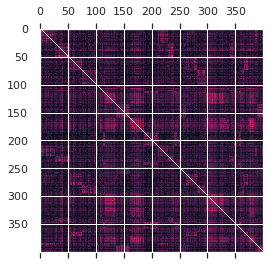

In [72]:
sns.set(style="darkgrid")
plt.matshow(sim_df,aspect='equal')

**Onteniendo los sentimientos y categorías asociados a cada texto:**

In [73]:
atributos_df = pd.read_csv("reviews_text_caract.csv")
atributos_df

,file,categoria,sentimiento
0,coches_no_1_11.txt,coches,no
1,coches_no_1_13.txt,coches,no
2,coches_no_1_15.txt,coches,no
3,coches_no_1_18.txt,coches,no
4,coches_no_1_19.txt,coches,no
...,...,...,...
395,peliculas_yes_5_23.txt,peliculas,yes
396,peliculas_yes_5_4.txt,peliculas,yes
397,peliculas_yes_5_5.txt,peliculas,yes
398,peliculas_yes_5_7.txt,peliculas,yes


In [74]:
sentimientos = np.array(atributos_df["sentimiento"])
categorias = np.array(atributos_df["categoria"])

# Identificando sentimientos y categorias

## Con PCA

In [75]:
trans_data = PCA(n_components=2).fit_transform(bow_estandar).T

trans_data_df = pd.DataFrame([trans_data[0],trans_data[1], sentimientos, categorias])

#fig = plt.figure(figsize=(15, 8))
#sns.scatterplota(trans_data_df, x = trans_data_df.com)
trans_data_df = trans_data_df.T
trans_data_df.columns = ["componente1", "componente2", "sentimiento", "categoria"]
trans_data_df.head()

,componente1,componente2,sentimiento,categoria
0,-4.964075,-5.419021,no,coches
1,-1.228086,-2.383149,no,coches
2,-3.040412,-4.158516,no,coches
3,-4.368723,-4.616623,no,coches
4,-3.910358,-4.063544,no,coches


<AxesSubplot:xlabel='componente1', ylabel='componente2'>

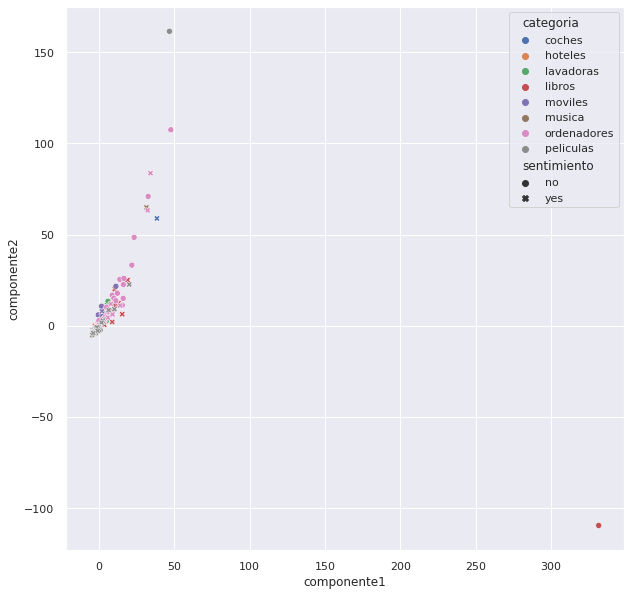

In [76]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=trans_data_df, x="componente1", y="componente2", style="sentimiento", hue="categoria")

## Con Kernel PCA

In [77]:
trans_data = KernelPCA(n_components=5, kernel="cosine").fit_transform(bow_estandar).T

trans_data_df = pd.DataFrame([trans_data[0],trans_data[1], sentimientos, categorias])

#fig = plt.figure(figsize=(15, 8))
#sns.scatterplota(trans_data_df, x = trans_data_df.com)
trans_data_df = trans_data_df.T
trans_data_df.columns = ["componente1", "componente2", "sentimiento", "categoria"]
trans_data_df.head()

,componente1,componente2,sentimiento,categoria
0,0.067456,-0.000305,no,coches
1,-0.081443,0.052924,no,coches
2,0.005189,0.012532,no,coches
3,0.087645,-0.034069,no,coches
4,0.04195,0.033952,no,coches


<AxesSubplot:xlabel='componente1', ylabel='componente2'>

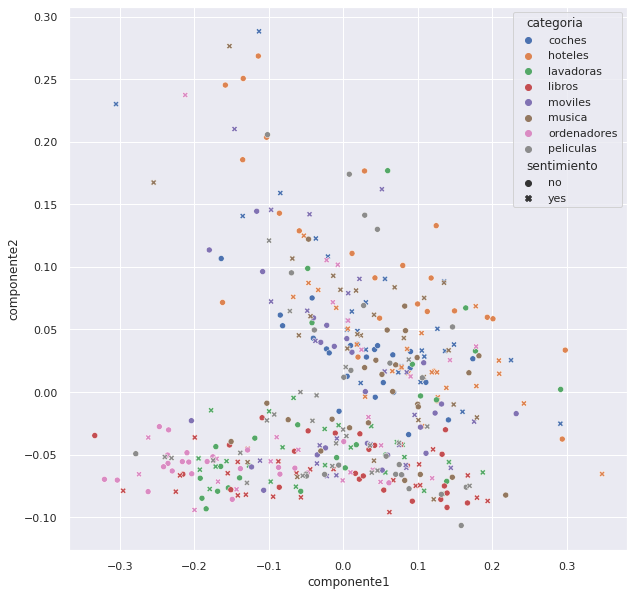

In [78]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=trans_data_df, x="componente1", y="componente2",
                style="sentimiento", hue="categoria")

## Con Spectral Embedding

In [79]:
trans_data =  SpectralEmbedding(n_components=2,eigen_solver='arpack',
                                n_neighbors=5).fit_transform(bow).T

trans_data_df = pd.DataFrame([trans_data[0],trans_data[1], sentimientos, categorias])

#fig = plt.figure(figsize=(15, 8))
#sns.scatterplota(trans_data_df, x = trans_data_df.com)
trans_data_df = trans_data_df.T
trans_data_df.columns = ["componente1", "componente2", "sentimiento", "categoria"]
trans_data_df.head()

,componente1,componente2,sentimiento,categoria
0,-0.014352,-0.00591,no,coches
1,-0.005169,-0.001394,no,coches
2,-0.01626,-0.004922,no,coches
3,-0.015928,-0.006176,no,coches
4,-0.018801,-0.007392,no,coches


<AxesSubplot:xlabel='componente1', ylabel='componente2'>

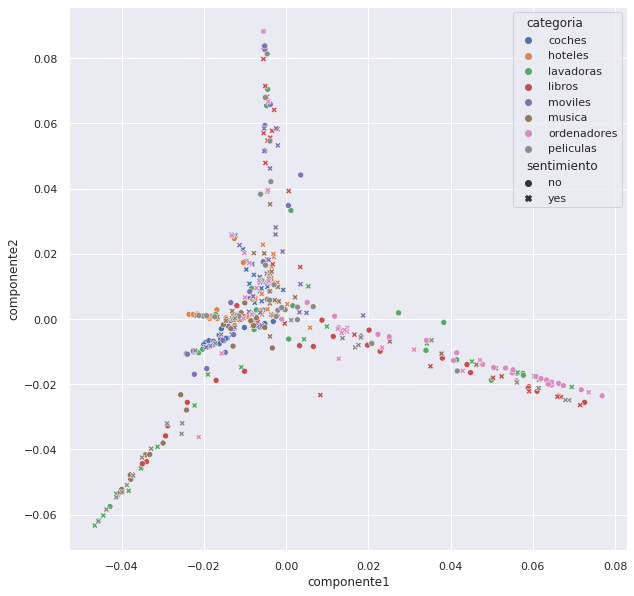

In [80]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=trans_data_df, x="componente1", y="componente2", style="sentimiento", hue="categoria")

## Con T-SNE

In [81]:
trans_data =  TSNE(n_components=2, init='pca', random_state=0, perplexity=5)\
                .fit_transform(bow).T

trans_data_df = pd.DataFrame([trans_data[0],trans_data[1], sentimientos, categorias])

#fig = plt.figure(figsize=(15, 8))
#sns.scatterplota(trans_data_df, x = trans_data_df.com)
trans_data_df = trans_data_df.T
trans_data_df.columns = ["componente1", "componente2", "sentimiento", "categoria"]
trans_data_df.head()

,componente1,componente2,sentimiento,categoria
0,-18.818884,26.580088,no,coches
1,11.355648,10.451402,no,coches
2,-26.446823,23.022104,no,coches
3,-18.964304,30.286793,no,coches
4,-15.693505,30.475147,no,coches


<AxesSubplot:xlabel='componente1', ylabel='componente2'>

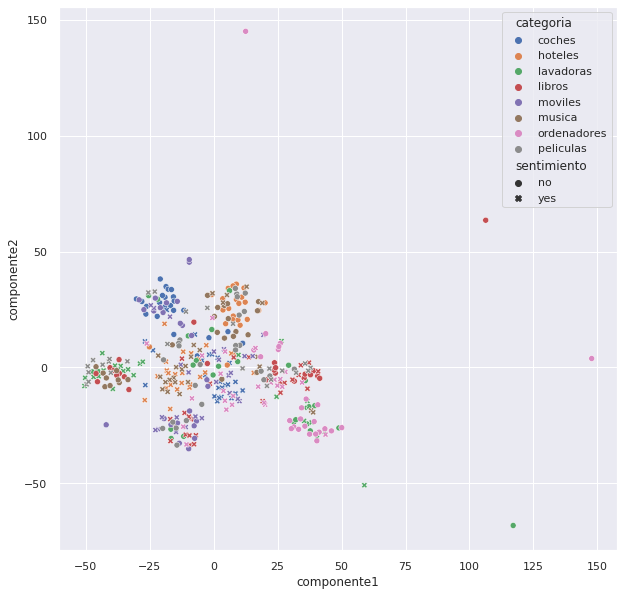

In [82]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=trans_data_df, x="componente1", y="componente2", style="sentimiento", hue="categoria")

# Clasificando textos por sentimiento:

Primero, separamos los textos en datos de entrenamiento y de prueba, con el fin de evaluar los modelos.

In [83]:
bow_train, bow_test, sentimiento_train, sentimiento_test, categoria_train, categoria_test = train_test_split(bow,
                                                                     sentimientos,categorias,
                                                                     test_size = 0.2,
                                                                     random_state = 42)

## Con LDA

In [84]:
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(bow_train, sentimiento_train)

In [85]:
lda_predict = lda.predict(bow_test)
lda_predict

array(['yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes'],
      dtype='<U3')

**Midiendo la calidad del modelo**

In [86]:
print(metrics.classification_report(sentimiento_test, lda_predict, digits=3))

              precision    recall  f1-score   support

          no      0.588     0.556     0.571        36
         yes      0.652     0.682     0.667        44

    accuracy                          0.625        80
   macro avg      0.620     0.619     0.619        80
weighted avg      0.623     0.625     0.624        80



**matriz de confusión**

In [87]:
metrics.confusion_matrix(sentimiento_test, lda_predict)

array([[20, 16],
       [14, 30]])

## Con QDA

In [88]:
qda = QuadraticDiscriminantAnalysis()
qda_model = qda.fit(bow_train, sentimiento_train)

/home/ed4st/anaconda3/envs/DS/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [89]:
qda_predict = qda.predict(bow_test)
qda_predict

array(['yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

**Midiendo la calidad del modelo**

In [90]:
print(metrics.classification_report(sentimiento_test, qda_predict, digits=3))

              precision    recall  f1-score   support

          no      0.200     0.056     0.087        36
         yes      0.514     0.818     0.632        44

    accuracy                          0.475        80
   macro avg      0.357     0.437     0.359        80
weighted avg      0.373     0.475     0.386        80



**matriz de confusión**

In [91]:
metrics.confusion_matrix(sentimiento_test, qda_predict)

array([[ 2, 34],
       [ 8, 36]])

## Con Regresión Logística

In [92]:
log_reg = linear_model.LogisticRegression(solver = 'sag', n_jobs=-1, max_iter=1000)
logistic_model = log_reg.fit(bow_train, sentimiento_train)

/home/ed4st/anaconda3/envs/DS/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [93]:
logistic_predict = logistic_model.predict(bow_test)
logistic_predict

array(['yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no',
       'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no'],
      dtype=object)

**Midiendo la calidad del modelo**

In [94]:
print(metrics.classification_report(sentimiento_test, logistic_predict, digits=3))

              precision    recall  f1-score   support

          no      0.556     0.694     0.617        36
         yes      0.686     0.545     0.608        44

    accuracy                          0.613        80
   macro avg      0.621     0.620     0.612        80
weighted avg      0.627     0.613     0.612        80



**matriz de confusión**

In [95]:
metrics.confusion_matrix(sentimiento_test, logistic_predict)

array([[25, 11],
       [20, 24]])

# Clasificando textos por categoría:

## Con LDA

In [96]:
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(bow_train, categoria_train)

In [97]:
lda_predict = lda.predict(bow_test)
lda_predict

array(['libros', 'musica', 'musica', 'musica', 'musica', 'musica',
       'libros', 'hoteles', 'musica', 'lavadoras', 'musica', 'musica',
       'musica', 'peliculas', 'lavadoras', 'musica', 'hoteles', 'musica',
       'musica', 'musica', 'musica', 'musica', 'musica', 'musica',
       'coches', 'peliculas', 'musica', 'hoteles', 'hoteles', 'musica',
       'lavadoras', 'musica', 'peliculas', 'musica', 'musica', 'coches',
       'libros', 'hoteles', 'lavadoras', 'lavadoras', 'peliculas',
       'hoteles', 'hoteles', 'peliculas', 'hoteles', 'libros',
       'lavadoras', 'musica', 'coches', 'peliculas', 'coches',
       'peliculas', 'musica', 'libros', 'musica', 'lavadoras', 'musica',
       'moviles', 'musica', 'peliculas', 'lavadoras', 'moviles',
       'lavadoras', 'musica', 'musica', 'peliculas', 'peliculas',
       'libros', 'libros', 'hoteles', 'musica', 'peliculas', 'coches',
       'libros', 'musica', 'libros', 'coches', 'musica', 'ordenadores',
       'libros'], dtype='<U11')

**Midiendo la calidad del modelo**

In [98]:
print(metrics.classification_report(categoria_test, lda_predict, digits=3))

              precision    recall  f1-score   support

      coches      0.667     0.308     0.421        13
     hoteles      0.556     0.385     0.455        13
   lavadoras      0.556     0.455     0.500        11
      libros      0.000     0.000     0.000         7
     moviles      0.000     0.000     0.000         8
      musica      0.094     0.300     0.143        10
 ordenadores      0.000     0.000     0.000         5
   peliculas      0.273     0.231     0.250        13

    accuracy                          0.250        80
   macro avg      0.268     0.210     0.221        80
weighted avg      0.331     0.250     0.270        80



## Con QDA

In [99]:
qda = QuadraticDiscriminantAnalysis()
qda_model = qda.fit(bow_train, categoria_train)

/home/ed4st/anaconda3/envs/DS/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [100]:
qda_predict = qda.predict(bow_test)
qda_predict

array(['moviles', 'moviles', 'libros', 'ordenadores', 'musica', 'libros',
       'libros', 'libros', 'hoteles', 'ordenadores', 'hoteles', 'moviles',
       'peliculas', 'libros', 'peliculas', 'lavadoras', 'moviles',
       'hoteles', 'ordenadores', 'coches', 'libros', 'musica', 'coches',
       'coches', 'libros', 'hoteles', 'lavadoras', 'musica', 'hoteles',
       'ordenadores', 'libros', 'lavadoras', 'ordenadores', 'coches',
       'libros', 'lavadoras', 'libros', 'libros', 'libros', 'libros',
       'libros', 'hoteles', 'hoteles', 'libros', 'libros', 'peliculas',
       'peliculas', 'peliculas', 'moviles', 'hoteles', 'hoteles',
       'peliculas', 'libros', 'peliculas', 'peliculas', 'coches',
       'lavadoras', 'libros', 'lavadoras', 'libros', 'ordenadores',
       'lavadoras', 'moviles', 'hoteles', 'hoteles', 'musica', 'hoteles',
       'hoteles', 'moviles', 'libros', 'peliculas', 'lavadoras',
       'ordenadores', 'musica', 'libros', 'peliculas', 'ordenadores',
       'peliculas'

**Midiendo la calidad del modelo**

In [101]:
print(metrics.classification_report(categoria_test, qda_predict, digits=3))

              precision    recall  f1-score   support

      coches      0.200     0.077     0.111        13
     hoteles      0.214     0.231     0.222        13
   lavadoras      0.375     0.273     0.316        11
      libros      0.143     0.429     0.214         7
     moviles      0.143     0.125     0.133         8
      musica      0.000     0.000     0.000        10
 ordenadores      0.000     0.000     0.000         5
   peliculas      0.250     0.231     0.240        13

    accuracy                          0.175        80
   macro avg      0.166     0.171     0.155        80
weighted avg      0.186     0.175     0.169        80



## Con Regresión Logística

In [102]:
log_reg = linear_model.LogisticRegression(solver = 'sag', n_jobs=-1, max_iter=1000)
logistic_model = log_reg.fit(bow_train, categoria_train)

/home/ed4st/anaconda3/envs/DS/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [103]:
logistic_predict = logistic_model.predict(bow_test)
logistic_predict

array(['peliculas', 'lavadoras', 'ordenadores', 'coches', 'hoteles',
       'musica', 'libros', 'hoteles', 'ordenadores', 'lavadoras',
       'coches', 'musica', 'musica', 'musica', 'ordenadores', 'coches',
       'hoteles', 'libros', 'moviles', 'moviles', 'hoteles', 'lavadoras',
       'peliculas', 'musica', 'coches', 'lavadoras', 'hoteles', 'moviles',
       'hoteles', 'libros', 'lavadoras', 'moviles', 'musica', 'hoteles',
       'moviles', 'musica', 'moviles', 'coches', 'lavadoras', 'lavadoras',
       'peliculas', 'hoteles', 'hoteles', 'coches', 'hoteles', 'libros',
       'lavadoras', 'ordenadores', 'coches', 'peliculas', 'coches',
       'peliculas', 'moviles', 'hoteles', 'libros', 'moviles', 'coches',
       'peliculas', 'coches', 'libros', 'ordenadores', 'hoteles',
       'lavadoras', 'lavadoras', 'musica', 'hoteles', 'moviles', 'musica',
       'lavadoras', 'hoteles', 'ordenadores', 'peliculas', 'coches',
       'moviles', 'lavadoras', 'moviles', 'coches', 'hoteles', 'libros',

**Midiendo la calidad del modelo**

In [104]:
print(metrics.classification_report(categoria_test, logistic_predict, digits=3))

              precision    recall  f1-score   support

      coches      0.667     0.615     0.640        13
     hoteles      0.562     0.692     0.621        13
   lavadoras      0.250     0.273     0.261        11
      libros      0.286     0.286     0.286         7
     moviles      0.364     0.500     0.421         8
      musica      0.333     0.300     0.316        10
 ordenadores      0.167     0.200     0.182         5
   peliculas      0.286     0.154     0.200        13

    accuracy                          0.400        80
   macro avg      0.364     0.377     0.366        80
weighted avg      0.394     0.400     0.391        80



# Recuperando información

Con base en un texto (Query) de consulta, implementamos un método basado en la disimilaridad en el 
espacio de representación vectorial de los textos. Esta disimilaridad, la calculamos a partir del coseno de los
textos en $\mathbb{R}^{|V|}$; encontramos los cinco textos más cercanos del corpus y los mostramos por pantalla.

In [105]:
query_ejemplo = "Los saltos con breves reflexiones, de lectura ágil y sin problemas de comprensión de una historia que se cuenta hacia atrás y en pequeñas dosis. Al libro le sobran páginas, divagaciones que no aportan demasiado, sin embargo me gustó bastante"

**vectorizamos el query**

In [106]:
query_preprocesado = preprocesador.preprocesa(query_ejemplo)
vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,1), binary=False, max_features=10000)
vector = vectorizer.fit_transform([query_preprocesado])
#bow_ = X.toarray()
vector.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [107]:
cos_sim = cosine_similarity(bow, bow)
sim_df = pd.DataFrame(cos_sim)
sim_df

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,1.000000,0.347434,0.288001,0.325269,0.302061,0.302550,0.230159,0.257491,0.266789,0.122601,...,0.136765,0.103775,0.203961,0.153972,0.113156,0.090575,0.102316,0.249444,0.144715,0.092070
1,0.347434,1.000000,0.278403,0.214310,0.254551,0.358351,0.224825,0.250906,0.224109,0.333681,...,0.271373,0.131507,0.275449,0.311949,0.201514,0.103008,0.279425,0.210736,0.312906,0.178657
2,0.288001,0.278403,1.000000,0.289806,0.254290,0.445576,0.309577,0.304669,0.255223,0.222226,...,0.167441,0.065686,0.230272,0.208455,0.244987,0.138919,0.198336,0.157890,0.180338,0.121108
3,0.325269,0.214310,0.289806,1.000000,0.273394,0.286868,0.244120,0.223454,0.205798,0.204909,...,0.188325,0.020966,0.171957,0.141134,0.094561,0.054193,0.116561,0.251976,0.066514,0.056965
4,0.302061,0.254551,0.254290,0.273394,1.000000,0.328168,0.367473,0.233334,0.219782,0.255865,...,0.095668,0.053737,0.109000,0.165365,0.074574,0.058928,0.099585,0.258333,0.209821,0.069527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.090575,0.103008,0.138919,0.054193,0.058928,0.143725,0.028636,0.069314,0.076042,0.093186,...,0.265805,0.413162,0.327937,0.355604,0.258020,1.000000,0.314850,0.328971,0.279797,0.360832
396,0.102316,0.279425,0.198336,0.116561,0.099585,0.158296,0.121482,0.059876,0.099950,0.158384,...,0.380517,0.332860,0.412463,0.327392,0.330371,0.314850,1.000000,0.308897,0.475045,0.372882
397,0.249444,0.210736,0.157890,0.251976,0.258333,0.177647,0.205042,0.135549,0.118837,0.158868,...,0.282156,0.396214,0.272554,0.254017,0.164957,0.328971,0.308897,1.000000,0.257845,0.307583
398,0.144715,0.312906,0.180338,0.066514,0.209821,0.213942,0.154641,0.139735,0.065810,0.181455,...,0.307296,0.305719,0.385981,0.371367,0.379610,0.279797,0.475045,0.257845,1.000000,0.466335


## creando un corpus

In [108]:
mypath = "all_files/"
_, _, filenames = next(walk(mypath))

In [109]:
archivos= [open(mypath+filename, "r", encoding="latin-1") for filename in filenames]
corpus = [archivo.read() for archivo in archivos]
corpus.append(query_ejemplo) #añadimos el texto de consulta al vocabulario

## Preprocesando el corpus

In [110]:
preprocesador = preprocesaTexto(idioma='es', _tokeniza=False, _muestraCambios=False, _quitarAcentos=True, _quitarNumeros=True,
                                _remueveStop=True, _stemming=False, _lematiza=True, _removerPuntuacion=True)

In [111]:
corpus_prep = [preprocesador.preprocesa(txt) for txt in corpus]

## BOW

In [112]:
vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,1), binary=False, max_features=10000)
X = vectorizer.fit_transform(corpus_prep)
bow = X.toarray()
bow_estandar = StandardScaler().fit_transform(bow) 
bow_df = pd.DataFrame(bow,columns=vectorizer.get_feature_names())
bow_df

,aar,abajo,abandonado,abandonar,abandono,abandón,abarcar,abatar,abatibl,abatir,...,zumo,zumos,zwan,zón,án,ás,él,ñoña,ñoño,ús
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Dado que hay mucha información irrelevante, tomamos la más representativa. Nos quedamos con las palabras que tienen por lo menos 3 concurrencias en los 400 textos.

In [113]:
frecuencias_por_palabra = bow_df.sum(axis=0)
frecuencias_por_palabra[frecuencias_por_palabra>6]

abajo              16
abandonar           9
abierto            20
abrir              36
absolutamente      10
                 ... 
zapato              8
zeitgeist           9
zona               39
án                  9
él               1170
Length: 2278, dtype: int64

In [114]:
palabras_relevantes = list(frecuencias_por_palabra[frecuencias_por_palabra>6].index)
palabras_relevantes

['abajo',
 'abandonar',
 'abierto',
 'abrir',
 'absolutamente',
 'absoluto',
 'absurdo',
 'abuela',
 'aburrido',
 'aburrir',
 'acabado',
 'acabar',
 'acaso',
 'acceder',
 'acceso',
 'accesorio',
 'accidente',
 'accion',
 'aceite',
 'aceptable',
 'aceptar',
 'acer',
 'acerca',
 'acercar',
 'acero',
 'acertado',
 'aclarado',
 'aclarar',
 'acompañado',
 'acompañar',
 'acondicionado',
 'aconsejar',
 'aconsejo',
 'acontecimiento',
 'acorde',
 'acostumbrado',
 'acostumbrar',
 'acto',
 'actor',
 'actriz',
 'actuacion',
 'actuación',
 'actual',
 'actualmente',
 'actuar',
 'acudir',
 'acuerdo',
 'acustico',
 'adaptacion',
 'adecuado',
 'adelante',
 'adema',
 'ademas',
 'admitir',
 'adolescente',
 'adquirir',
 'adulto',
 'aeg',
 'aeropuerto',
 'aficionado',
 'agenda',
 'agradable',
 'agua',
 'aguantar',
 'aguo',
 'ah',
 'ahi',
 'ahora',
 'ahorrar',
 'airbag',
 'aire',
 'ajustado',
 'ajustar',
 'album',
 'alcanzar',
 'alegrio',
 'alejado',
 'alemar',
 'alguien',
 'algun',
 'alguno',
 'allen',
 'a

# Identificando disimilaridad en los textos con la disimilaridad del coseno

In [115]:
# redefinimos la BOW
bow = bow_df[palabras_relevantes]
cos_sim = cosine_similarity(bow, bow)
sim_df = pd.DataFrame(cos_sim)
sim_df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,1.000000,0.347434,0.288001,0.325269,0.302061,0.302550,0.230159,0.257491,0.266789,0.122601,...,0.103775,0.203961,0.153972,0.113156,0.090575,0.102316,0.249444,0.144715,0.092070,0.000000
1,0.347434,1.000000,0.278403,0.214310,0.254551,0.358351,0.224825,0.250906,0.224109,0.333681,...,0.131507,0.275449,0.311949,0.201514,0.103008,0.279425,0.210736,0.312906,0.178657,0.012320
2,0.288001,0.278403,1.000000,0.289806,0.254290,0.445576,0.309577,0.304669,0.255223,0.222226,...,0.065686,0.230272,0.208455,0.244987,0.138919,0.198336,0.157890,0.180338,0.121108,0.036923
3,0.325269,0.214310,0.289806,1.000000,0.273394,0.286868,0.244120,0.223454,0.205798,0.204909,...,0.020966,0.171957,0.141134,0.094561,0.054193,0.116561,0.251976,0.066514,0.056965,0.000000
4,0.302061,0.254551,0.254290,0.273394,1.000000,0.328168,0.367473,0.233334,0.219782,0.255865,...,0.053737,0.109000,0.165365,0.074574,0.058928,0.099585,0.258333,0.209821,0.069527,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.102316,0.279425,0.198336,0.116561,0.099585,0.158296,0.121482,0.059876,0.099950,0.158384,...,0.332860,0.412463,0.327392,0.330371,0.314850,1.000000,0.308897,0.475045,0.372882,0.028421
397,0.249444,0.210736,0.157890,0.251976,0.258333,0.177647,0.205042,0.135549,0.118837,0.158868,...,0.396214,0.272554,0.254017,0.164957,0.328971,0.308897,1.000000,0.257845,0.307583,0.000000
398,0.144715,0.312906,0.180338,0.066514,0.209821,0.213942,0.154641,0.139735,0.065810,0.181455,...,0.305719,0.385981,0.371367,0.379610,0.279797,0.475045,0.257845,1.000000,0.466335,0.024119
399,0.092070,0.178657,0.121108,0.056965,0.069527,0.166185,0.028380,0.222254,0.111651,0.115444,...,0.366825,0.397240,0.331433,0.278214,0.360832,0.372882,0.307583,0.466335,1.000000,0.038362


**tomamos los textos que mayor similaridad tiene con el query en la entrada 401**

In [116]:
similaridades_query = np.array(sim_df.iloc[400])
similaridades_query[:5]

array([0.        , 0.01232035, 0.03692325, 0.        , 0.        ])

In [117]:
top6 = similaridades_query.argsort()[-6:][::-1] #top 6 textos más parecidos

In [118]:
top5 = top6[1:]
top5

array([178, 375, 380, 179, 381])

In [119]:
i = 1
for rank_ix in top5:
    
    print(f" --------------top {i} texto más parecido al query-------------\n{corpus[rank_ix]}")
    i += 1
    

 --------------top 1 texto más parecido al query-------------
Cogi este libro de la biblioteca con bastantes dudas, por un lado me interesaba porque tenía curiosidad por el tema, por otro no me atraía mucho la autora (me parecía frívola y comercial, y el que tenga un Planeta no me dice nada). Además me animó alguna opinión muy favorable que leí aquí 
Debo decir que en general me llevé una grata sorpresa, no tanto porque me haya maravillado el modo de escribir de la autora, si no por el modo de llevar la trama y construir la historia. 
La novela cuenta cómo Beatriz vuelve a Madrid después de haber pasado cuatro años en Edimburgo, estudiando literatura inglesa. En Edimburgo deja atrás a Caitlin (Cat) , la chica con la que mantuvo una relación y a la que no le ha dicho claramente si volverá o no después del verano, y en Madrid después de su ausencia se encuentra sola, ya no le quedan amigos y con sus padres se lleva bastante mal. 
La trama se articula en torno a  la búsqueda y una visita 